# World records example

This example is in an illustration of concepts in python programming and the modelling of time-series data.

## Python concepts

This is a relatively complex Python program. Some parts are unfortunately too advanced by neccessity. You are not expected to be digest all of this right now, but you should be able to do something similar by the end of the course. Do not try to understand what the program is doing in detail, if you have no Python knowledge. Advanced concepts will be marked with 'advanced' 



In [10]:
# Import the necessary files
import pandas as pd

In [16]:
# Read all the tables from the following wikipedia article
tables = pd.read_html("https://en.wikipedia.org/wiki/1500_metres_world_record_progression")


,Time,Auto,Athlete,Date,Place
0,4:17.3+,NaN,Anne Smith (GBR),1967-06-03,"Chiswick, Great Britain"
1,4:15.6,NaN,Maria Gommers (NED),1967-10-24,"Sittard, Netherlands"
2,4:12.4,NaN,Paola Pigni (ITA),1969-07-02,"Milan, Italy"
3,4:10.7,4:10.77,Jaroslava Jehličková (CZE),1969-09-20,"Athens, Greece"
4,4:09.6,4:09.62,Karin Burneleit (GDR),1971-08-15,"Helsinki, Finland"
5,4:06.9,NaN,Ludmila Bragina (URS),1972-07-18,"Moscow, Soviet Union"
6,4:06.5,4:06.47,Ludmila Bragina (URS),1972-09-04,"Munich, Germany"
7,4:05.1,4:05.07,Ludmila Bragina (URS),1972-09-07,"Munich, Germany"
8,4:01.4,4:01.38,Ludmila Bragina (URS),1972-09-09,"Munich, Germany"
9,3:56.0,NaN,Tatyana Kazankina (URS),1976-06-28,"Podolsk, Soviet Union"


In [3]:
# Demonstrate how tables look like with indices etc
tables[0]["Date"]

0           1892
1     1893-05-28
2     1894-07-22
3     1895-05-12
4     1895-05-26
5     1895-08-26
6     1896-06-26
7     1900-05-30
8     1900-07-15
9     1904-09-03
10    1908-05-30
11    1912-05-26
12    1912-06-01
Name: Date, dtype: object

In [18]:
# For convenience, we define this variable to refer to the table we are interested in
m_table = tables[1]
f_table = tables[3]
# We want to plot the world record times versus the year, so we pick two columns from the table
m_times=m_table['Time']
m_dates=m_table['Date']
f_times=f_table['Time']
f_dates=f_table['Date']

# show how times and dates look like

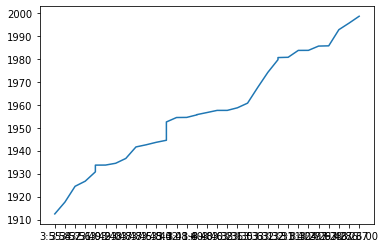

In [19]:
import matplotlib.pyplot as plt
plt.plot(times, dates) # this does not work! Dates have to be converted

In [20]:
# advanced python: multiple advanced concepts are used to convert the data into a numeric format.
# There is no 'easy' way to do this. You can ignore this at first.
def get_numerical_date_and_time (times, dates):
    dates = pd.to_datetime(dates) # advanced: convert the date *string* to a date *object* that we can later parse

    import numpy as np
    n_records = len(times)
    years = np.zeros(n_records) # create a zero vector for the years
    seconds = np.zeros(n_records) # create a zero vector for the seconds
    ## Now we need to parse the table into numbers
    for i in range(n_records): # advanced: first, we need to loop through all the records   
        years[i] = dates[i].date().year # advanced: extract the year from the full date
        # times are formatted as '3:30.23', sometimes with a + at the end
        tmp = times[i].replace("+","0").split(':') # advanced: this (1) replaces "+" wiht "0" and the splits the date in two numbers
        seconds[i] = float(tmp[0])*60+float(tmp[1]) # this combines the number of minutes and number of seconds in total seconds
    return years, seconds

m_years, m_seconds = get_numerical_date_and_time(m_times, m_dates)
f_years, f_seconds = get_numerical_date_and_time(f_times, f_dates)


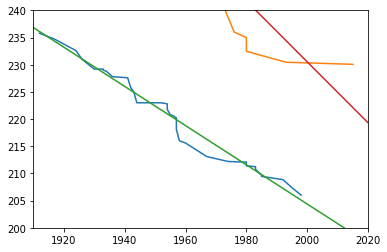

In [26]:
#simply plot the records
import matplotlib.pyplot as plt
# plot the progression directly
plt.plot(m_years, m_seconds)
plt.plot(f_years, f_seconds)

# we also fit two lines to the data and plot those
m_b, m_a = np.polyfit(m_years, m_seconds, deg=1)
f_b, f_a = np.polyfit(f_years, f_seconds, deg=1)
x_axis = np.linspace(1910,2020) # generate an x axis sequence for plotting the fit
plt.plot(x_axis, m_a + x_axis * m_b) 
plt.plot(x_axis, f_a + x_axis * f_b) 
plt.axis([1910, 2020, 200, 240])
plt.savefig("records.pdf")

# Discussion of linear fit

Obviosuly, the regression line all the way to zero does not make any sense. If we extend the x-axis to 400 or so, then we get the following plot, which shows that the women's times surpass the men's times in 2100 approximately, and they even reach negative values in 2400.

Our guiding principle for modelling then has to be related to the process of how the data has been generated. Are athletes improving all the time, or are just some athletes randomly giving us better times? The other principle relies on fundamental aspects of the data. We believe it is impossible for anybody to run faster than 10 (11) seconds (for weomen) per 100m for an extended period, so that the absolute lowest time must be 150 seconds for men and 165 for women.

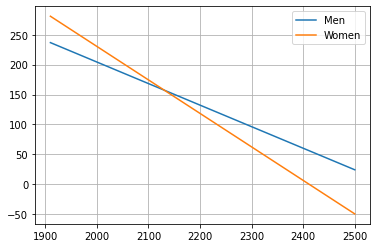

In [32]:
x_axis = np.linspace(1910,2500) # generate an x axis sequence for plotting the fit
plt.plot(x_axis, m_a + x_axis * m_b) 
plt.plot(x_axis, f_a + x_axis * f_b) 
plt.legend(["Men", "Women"])
plt.grid()

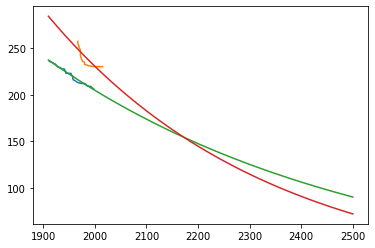

In [63]:
# We want to have a linear model, but we can simply try to transform our variables and fit a linear model to the logarithm of the time.

m_b, m_a = np.polyfit(m_years, np.log(m_seconds), deg=1)
f_b, f_a = np.polyfit(f_years, np.log(f_seconds), deg=1)
x_axis = np.linspace(1910, 2500) # generate an x axis sequence for plotting the fit
plt.plot(m_years, m_seconds)
plt.plot(f_years, f_seconds)
plt.plot(x_axis, np.exp(m_a + x_axis * m_b)) 
plt.plot(x_axis, np.exp(f_a + x_axis * f_b) )


# Discussion of logarithmic fit

This fit is more reasonable. It does not reach zero, and it is nearly linear, if we zoom in, as we'll see in the graph below.
On the other hand, the female athletes still suprass male performance.


(1910.0, 2020.0, 200.0, 240.0)

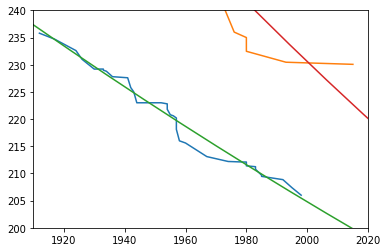

In [65]:
plt.plot(m_years, m_seconds)
plt.plot(f_years, f_seconds)
plt.plot(x_axis, np.exp(m_a + x_axis * m_b)) 
plt.plot(x_axis, np.exp(f_a + x_axis * f_b) )
plt.axis([1910, 2020, 200, 240])


# Discussion on the need for a more elaborate model

Finally, we need some way to potentially explain the data. For this, we can look at more data sources. Do the world record changes reflect a real improvement in performance (e.g. due to improved training, technology, drugs), or is it simply a statistical artefact and performance is relatively stable? 

For this, we can try and look at seasonal data. Is there a trend of worlds best times getting better every year? Wikipedia has a table on yearly best times for 100m, which we can try and look at. There, we can see that the average best times over each decade were:

1970s: 10.043
1980s: 9.987
1990s: 9.873
2000s: 9.79
2010s: 9.762

Since average best times are getting lower, it suggests at the very least, that the top-tier athletes are overall getting faster. However, a more in-depth analysis is required to make a firm conclusion.




,0,1,2,3
0,Men[edit] Year Time Athlete Place 1972 10.07 ...,Women[edit] Year Time Athlete Place 1972 11.07...,NaN,NaN
1,Year,Time,Athlete,Place
2,1972,10.07,Valeriy Borzov (URS),Munich
3,1973,10.15,Steve Williams (USA),Dakar
4,1974,9.9h,Steve Williams (USA),Los Angeles
...,...,...,...,...
112,2018,10.85,Dina Asher-Smith (GBR),Berlin
113,2019,10.71,Shelly-Ann Fraser-Pryce (JAM),Doha
114,2020,10.85,Elaine Thompson-Herah (JAM),Rome
115,2021,10.54,Elaine Thompson-Herah (JAM),Eugene
